In [24]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import special as sp
import matplotlib.animation as animation

In [19]:
N = 100
dt = 0.000025
dx = 1/100
D = 1
t_max = round(1/dt)

4*(D*dt / (dx**2))

1.0

In [20]:
def init(N):
    grid = np.zeros((N,N))
    grid[0] = np.ones(N)
    return grid

def update_dif(grid, D):
    grid_old = np.copy(grid)
    for j in range(1, len(grid)-1):
        for i in range(len(grid)):
            if i == 0:
                 grid[j,i] = grid_old[j,i] + ( D*dt / (dx**2)) * (grid_old[j+1,i] + grid_old[j-1,i]+ grid_old[j,i+1] +grid_old[j,-1] -4 * grid_old[j,i]) 
            elif i == N-1:
                 grid[j,i] = grid_old[j,i] + ( D*dt / (dx**2)) * (grid_old[j+1,i] + grid_old[j-1,i]+ grid_old[j,N-1] +grid_old[j,i-1] -4 * grid_old[j,i]) 
            else:
                 grid[j,i] = grid_old[j,i] + ( D*dt / (dx**2)) * (grid_old[j+1,i] + grid_old[j-1,i]+ grid_old[j,i+1] +grid_old[j,i-1] -4 * grid_old[j,i])
    return(grid)  

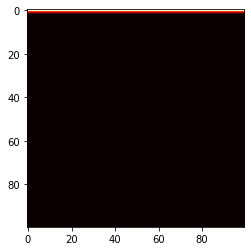

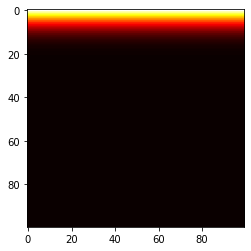

c =  0.0048702814496367


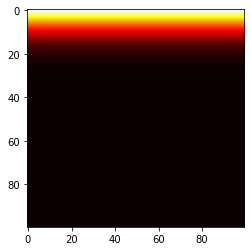

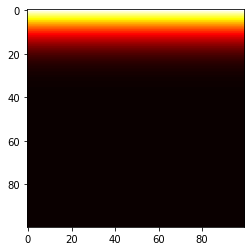

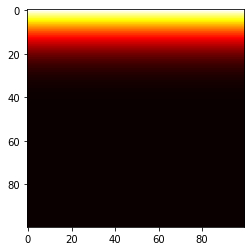

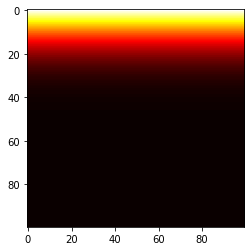

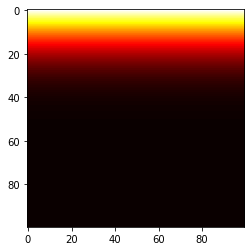

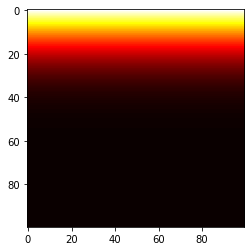

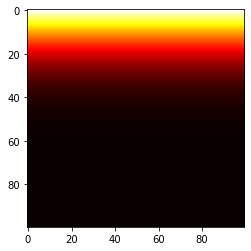

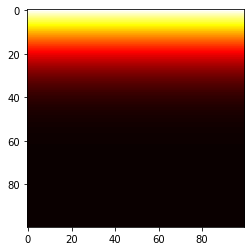

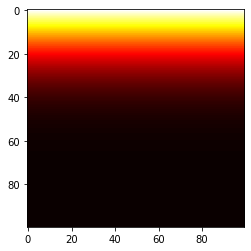

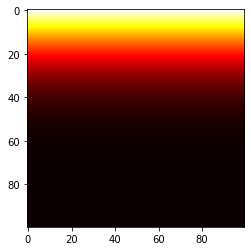

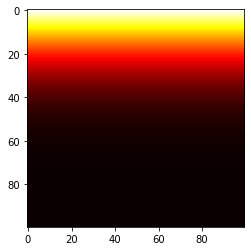

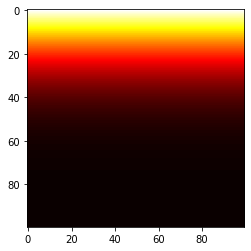

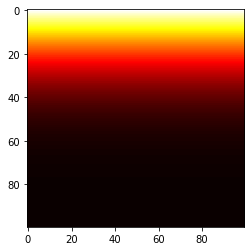

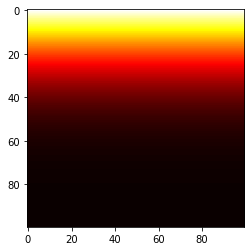

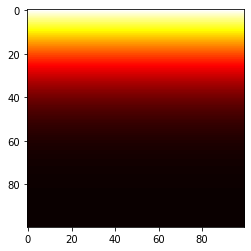

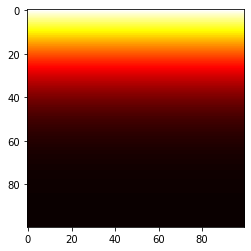

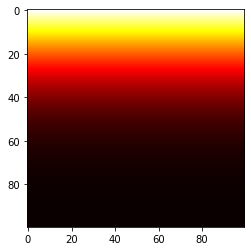

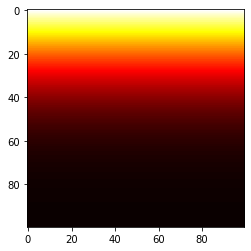

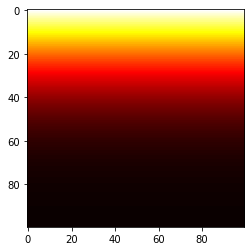

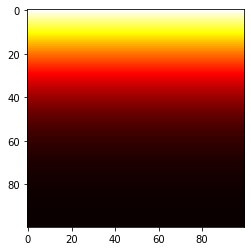

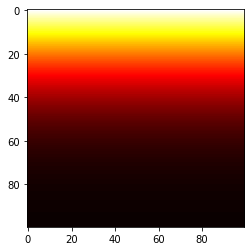

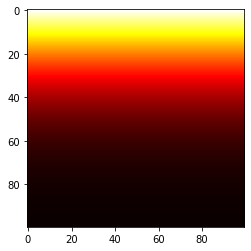

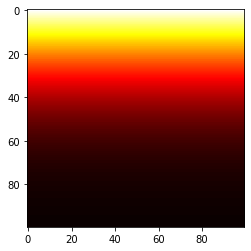

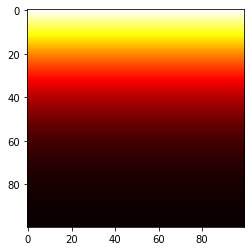

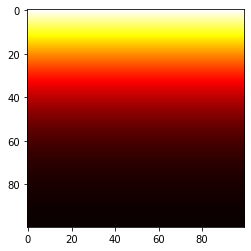

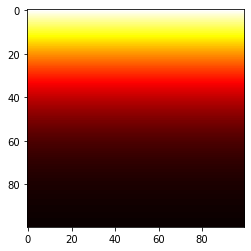

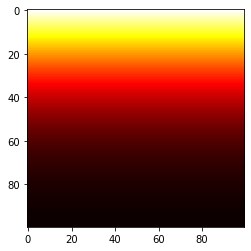

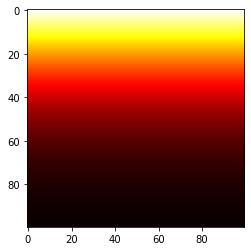

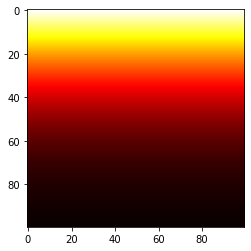

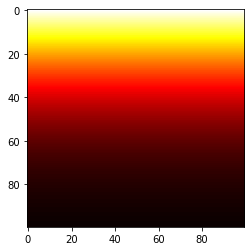

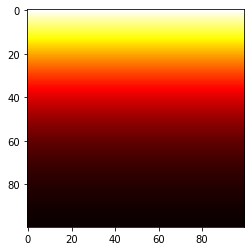

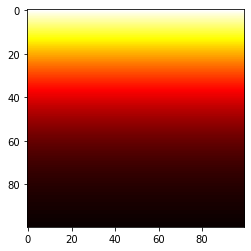

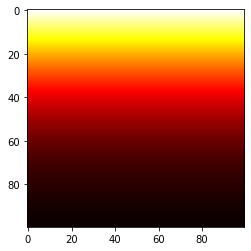

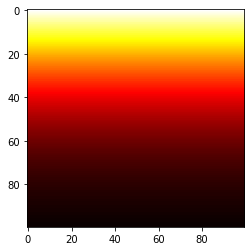

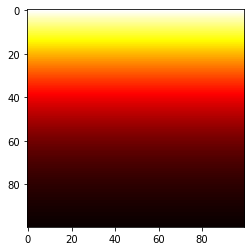

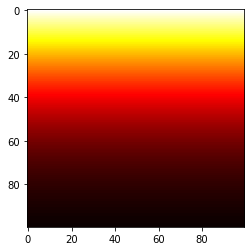

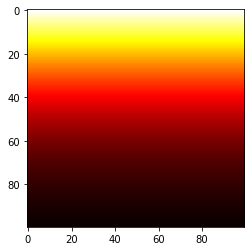

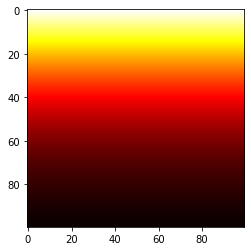

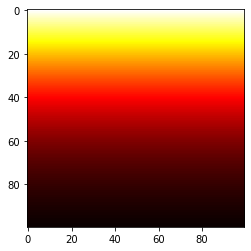

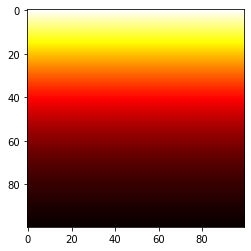

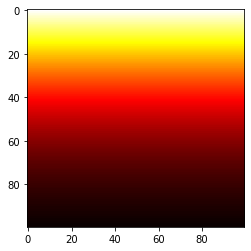

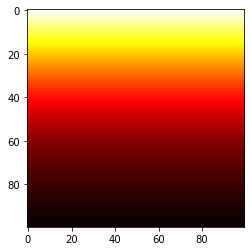

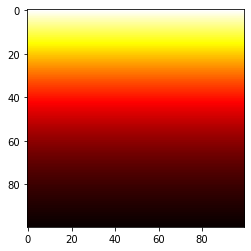

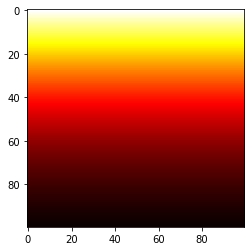

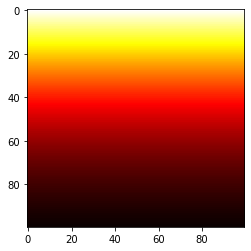

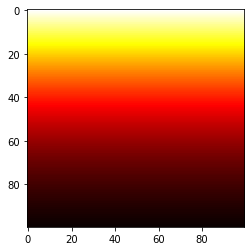

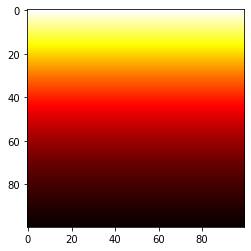

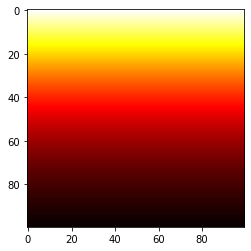

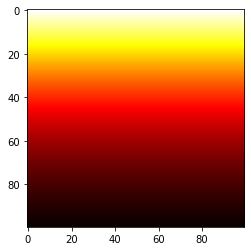

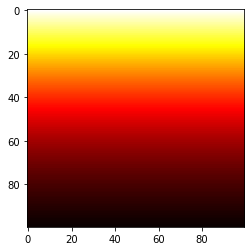

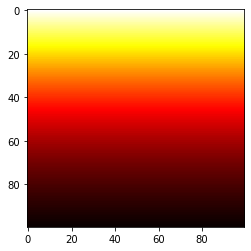

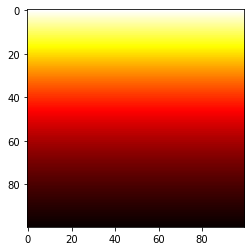

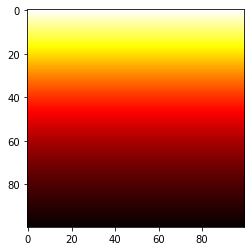

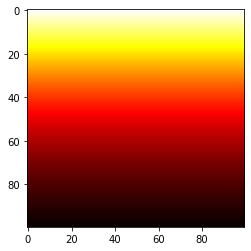

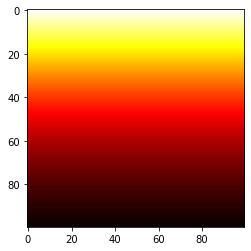

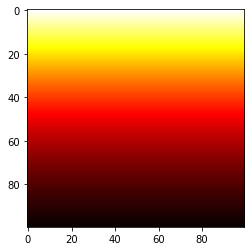

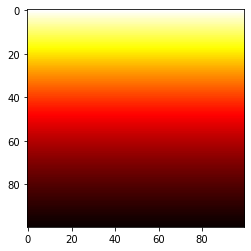

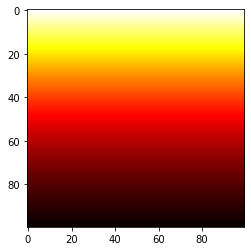

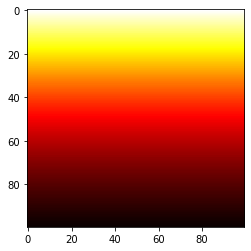

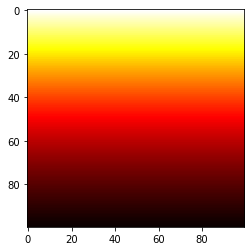

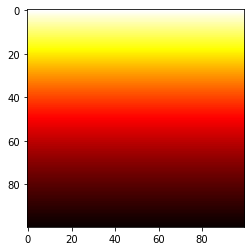

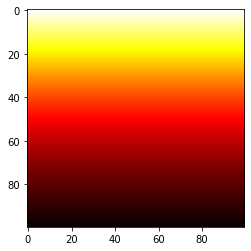

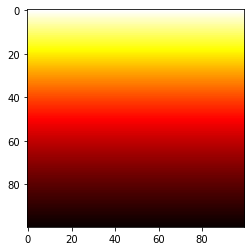

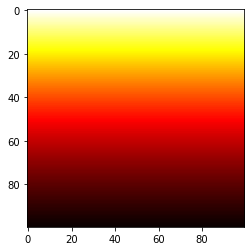

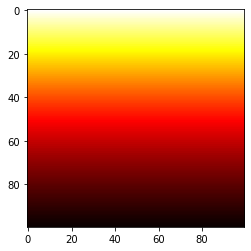

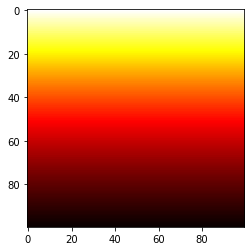

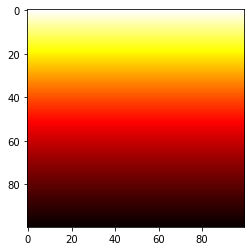

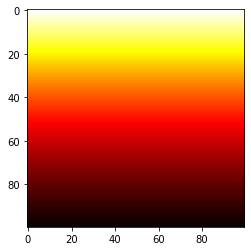

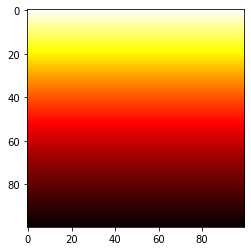

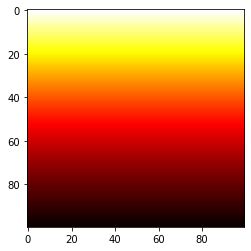

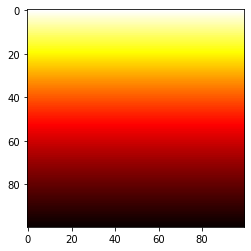

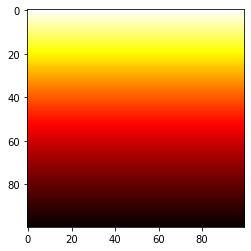

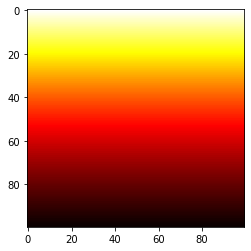

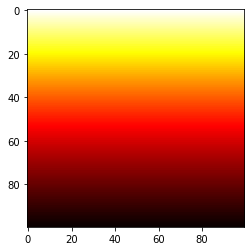

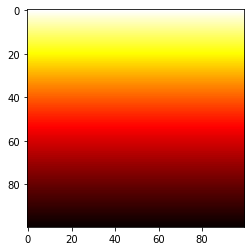

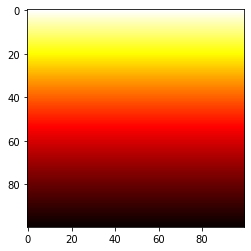

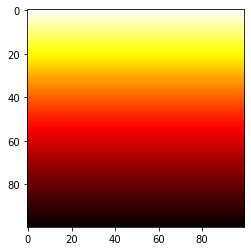

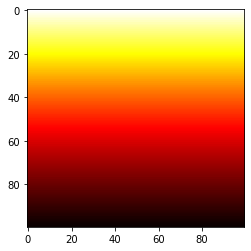

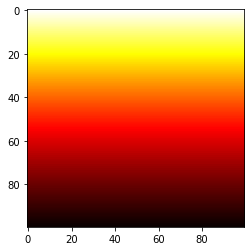

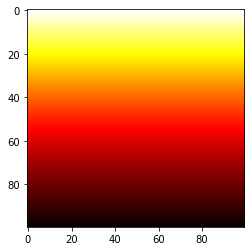

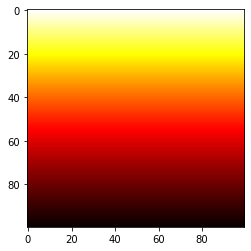

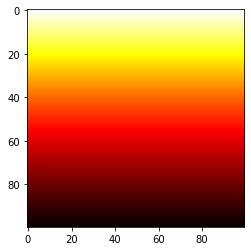

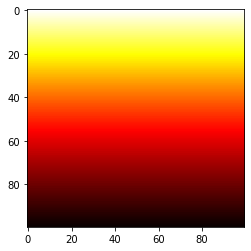

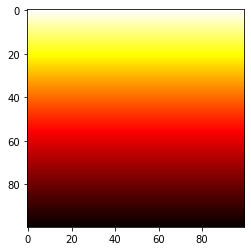

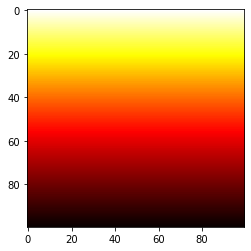

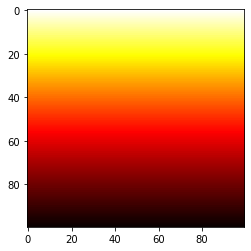

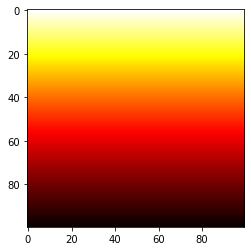

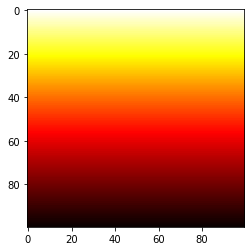

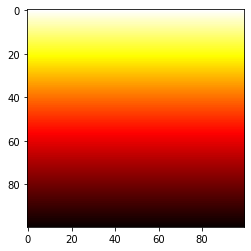

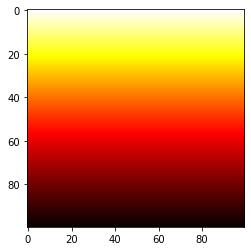

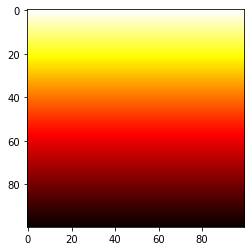

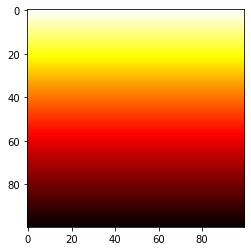

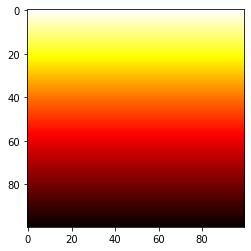

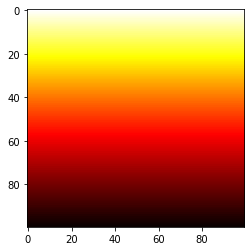

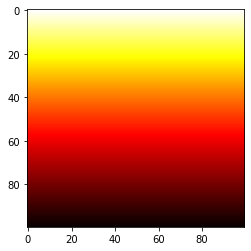

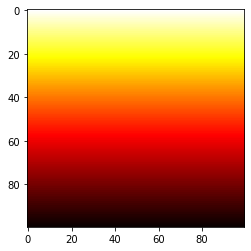

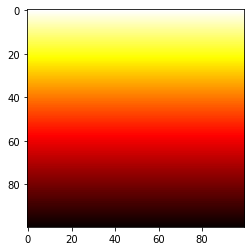

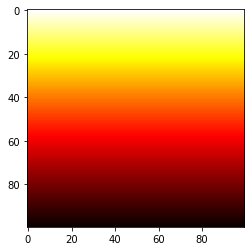

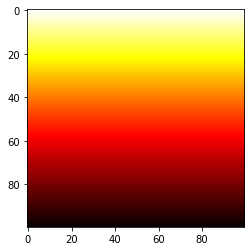

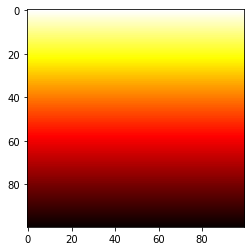

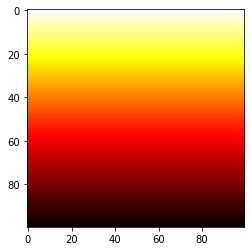

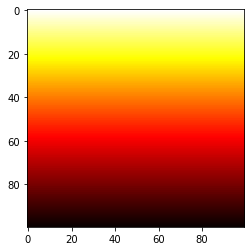

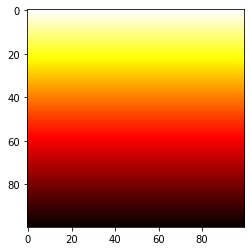

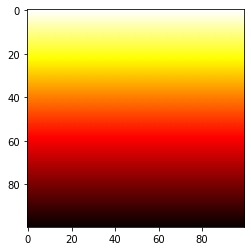

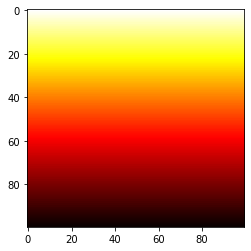

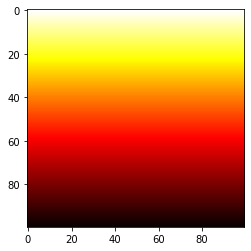

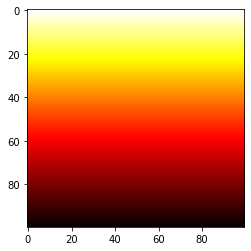

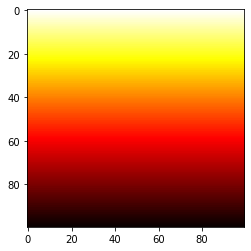

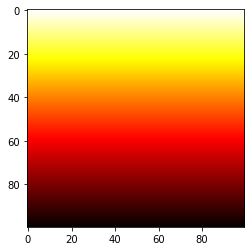

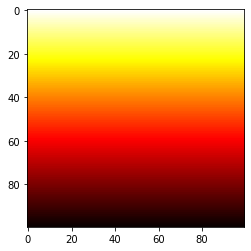

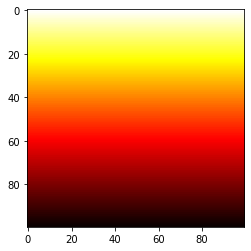

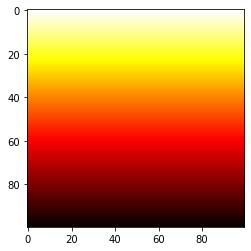

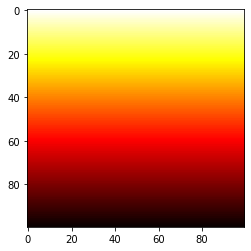

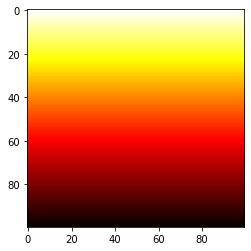

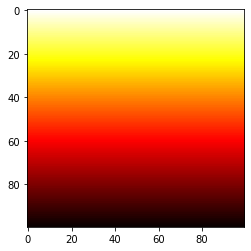

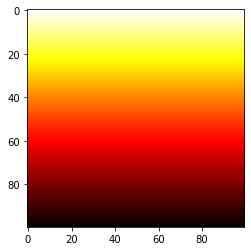

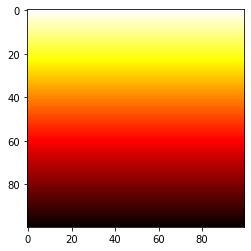

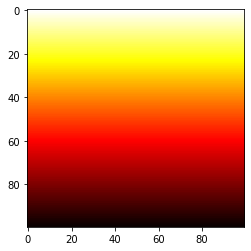

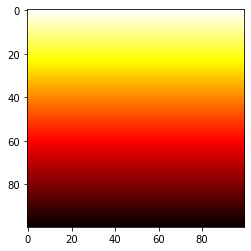

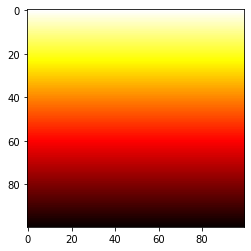

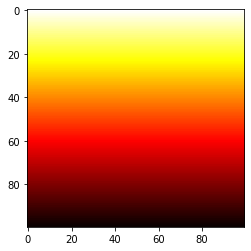

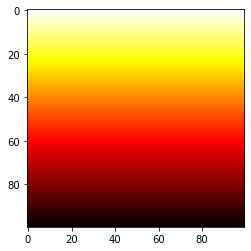

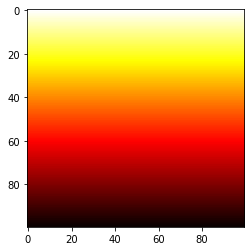

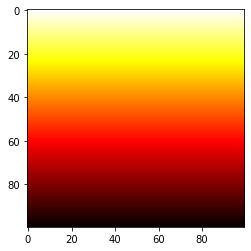

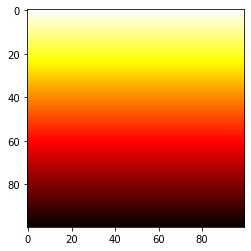

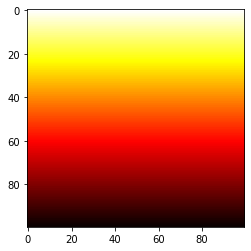

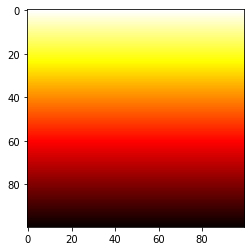

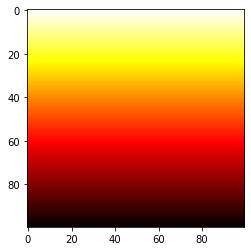

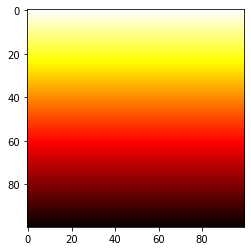

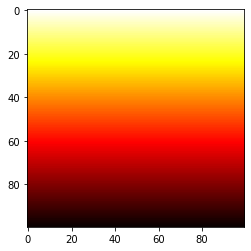

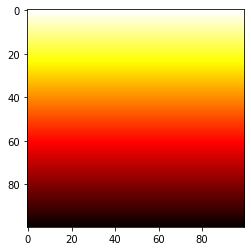

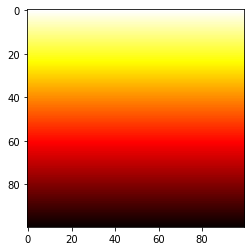

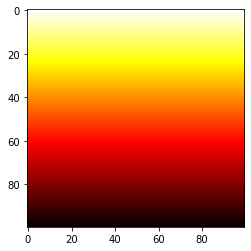

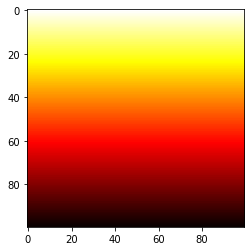

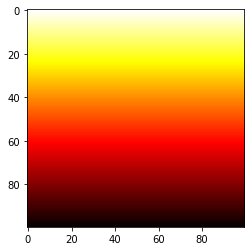

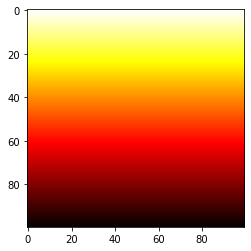

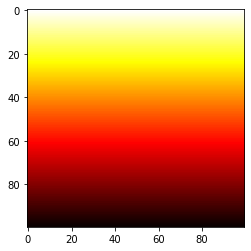

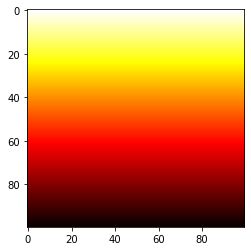

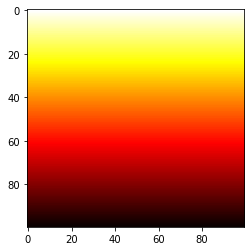

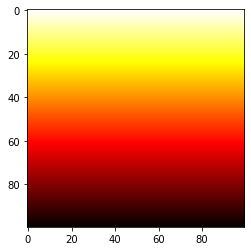

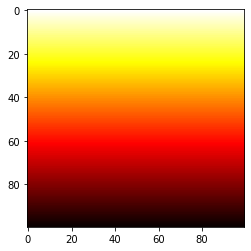

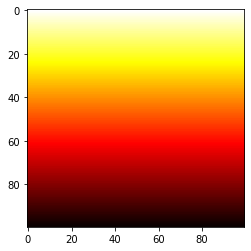

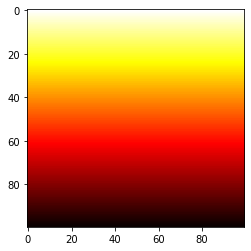

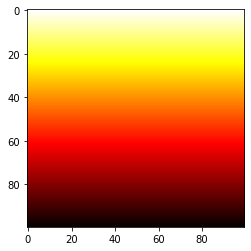

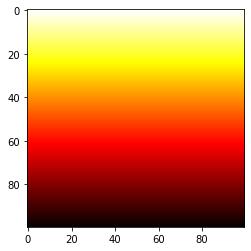

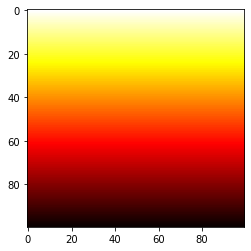

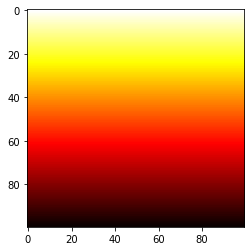

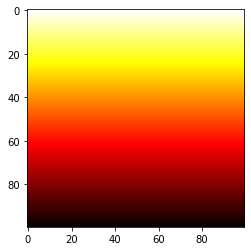

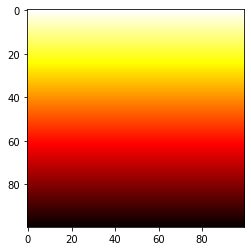

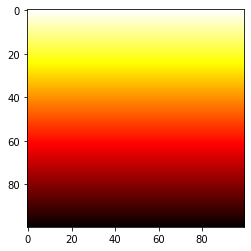

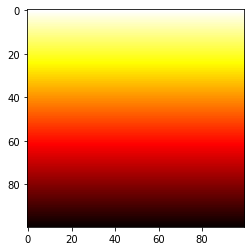

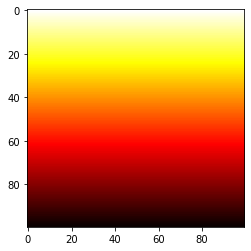

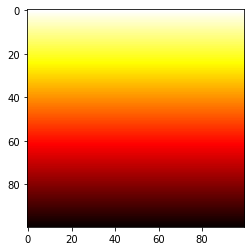

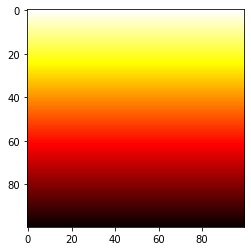

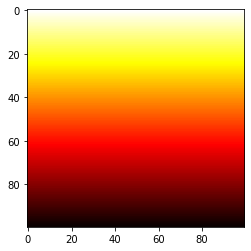

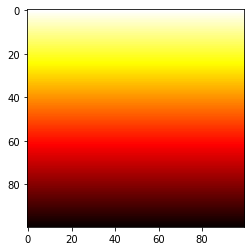

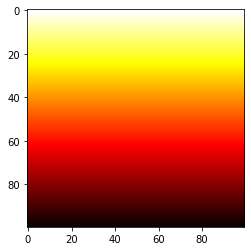

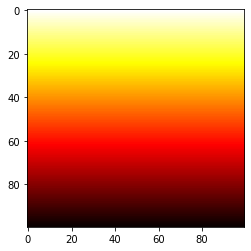

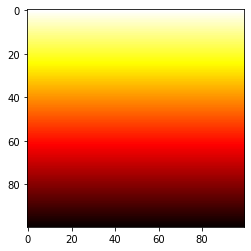

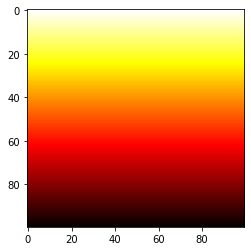

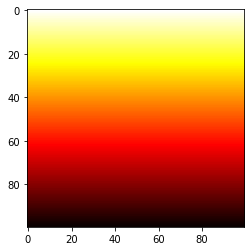

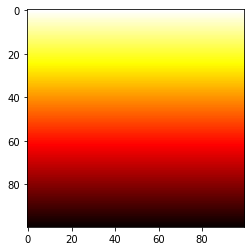

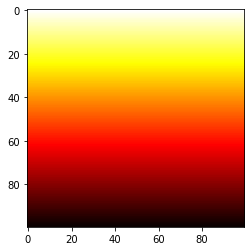

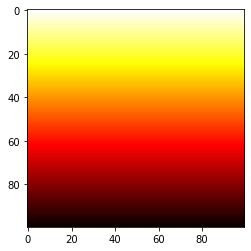

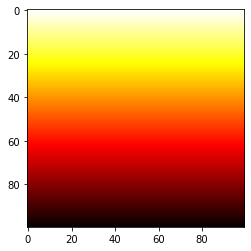

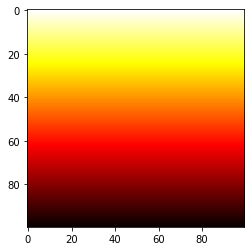

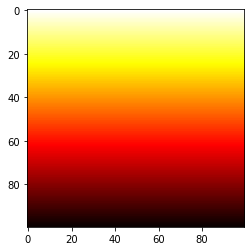

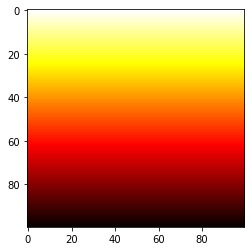

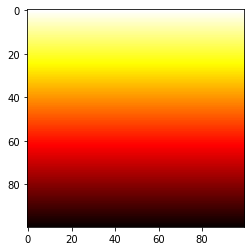

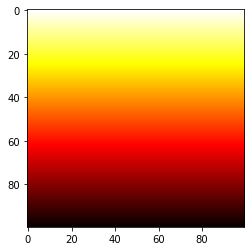

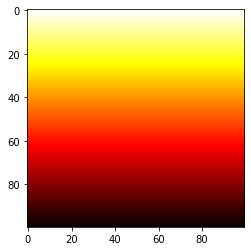

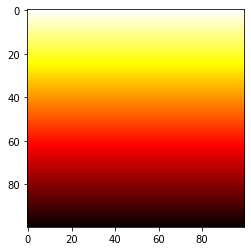

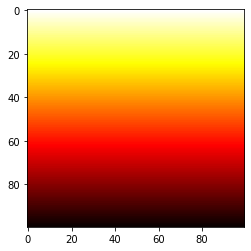

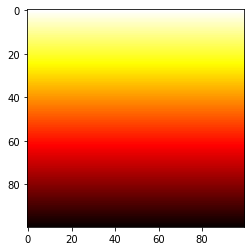

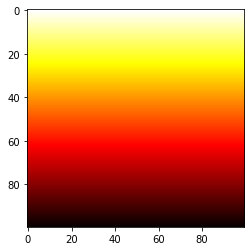

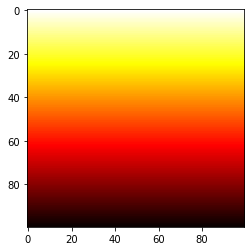

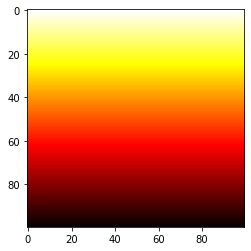

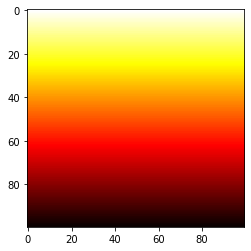

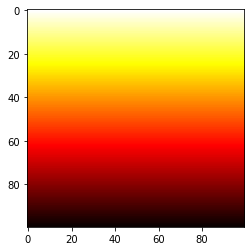

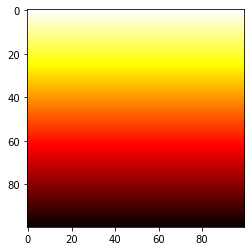

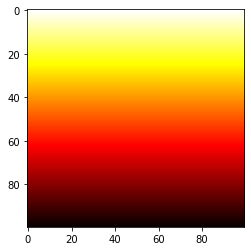

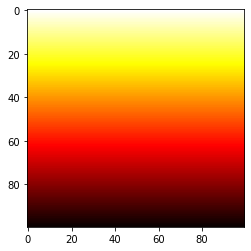

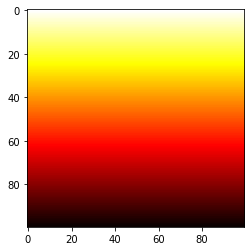

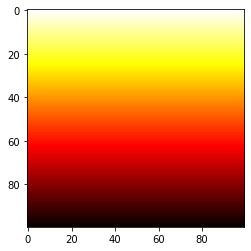

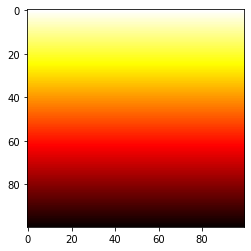

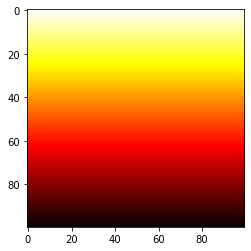

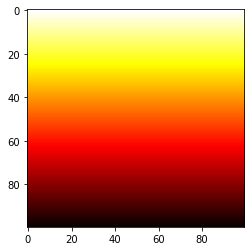

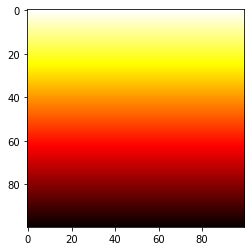

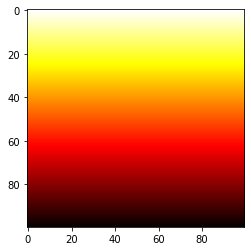

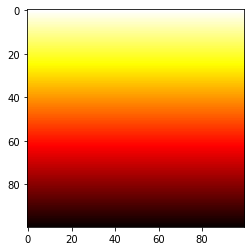

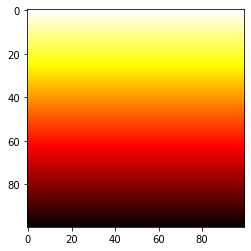

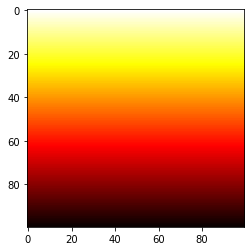

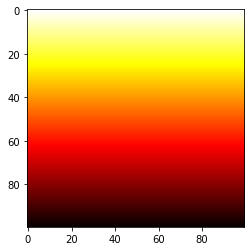

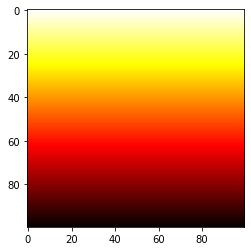

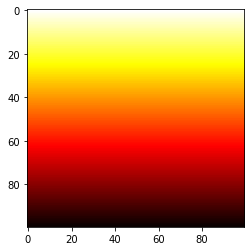

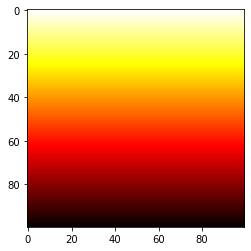

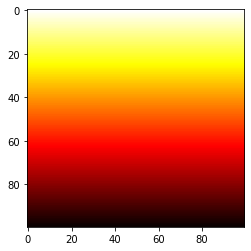

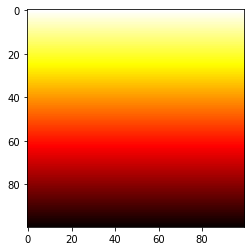

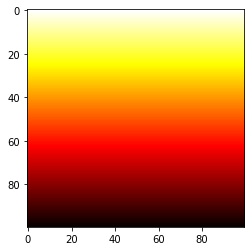

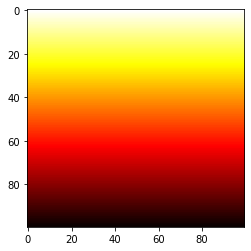

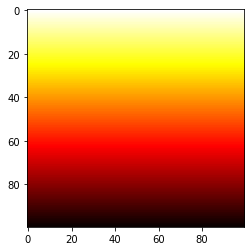

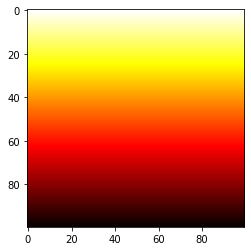

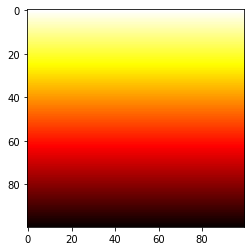

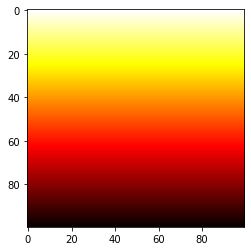

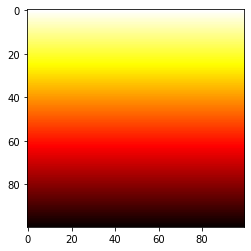

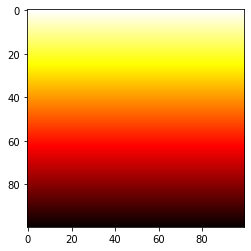

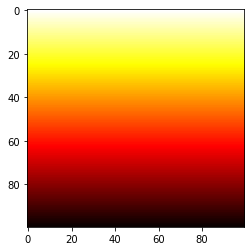

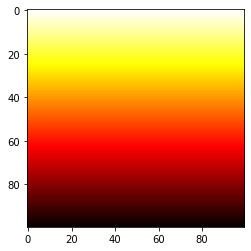

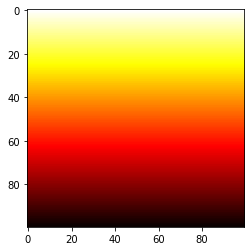

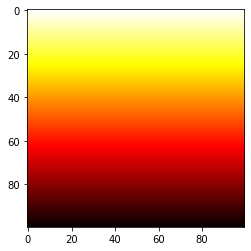

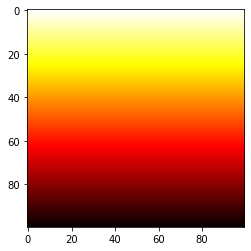

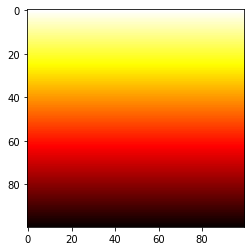

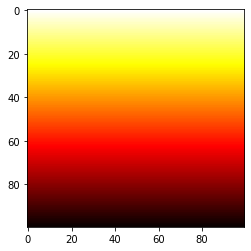

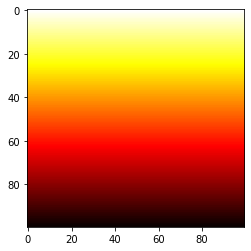

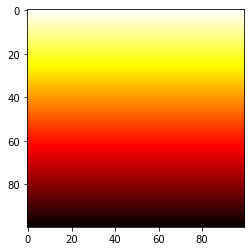

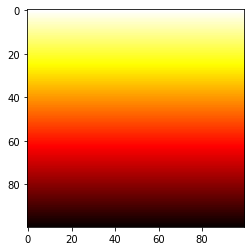

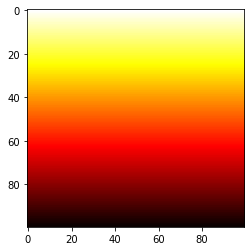

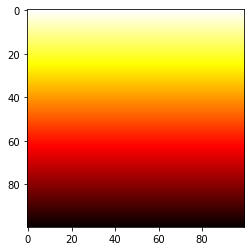

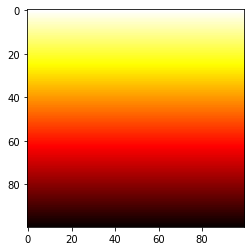

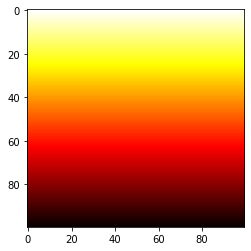

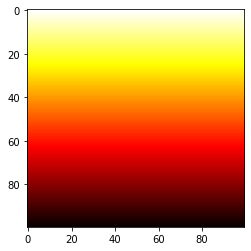

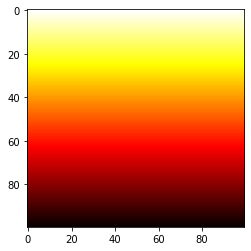

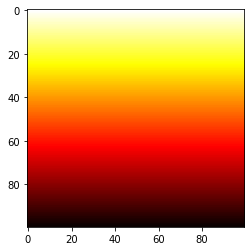

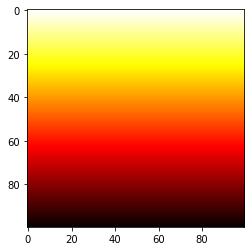

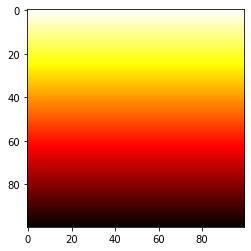

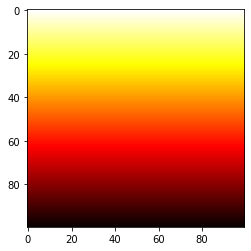

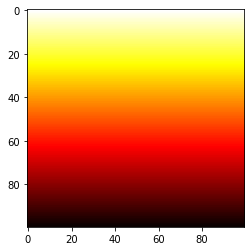

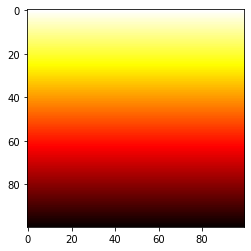

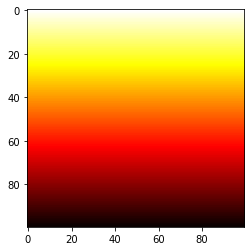

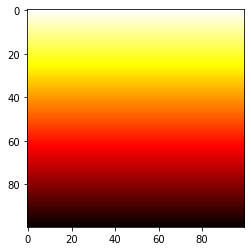

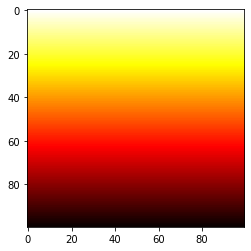

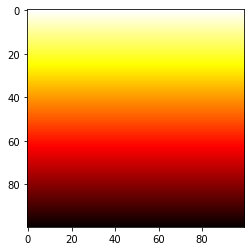

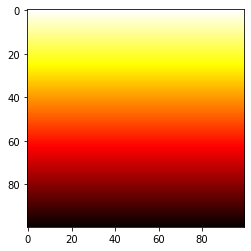

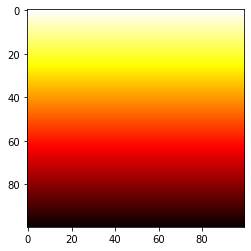

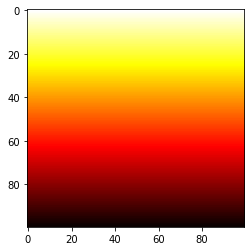

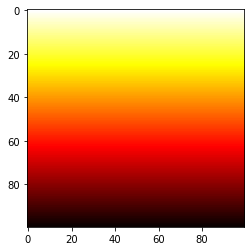

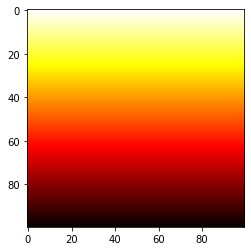

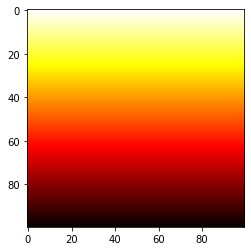

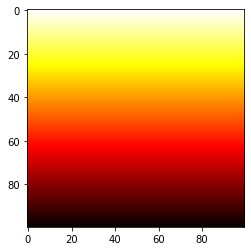

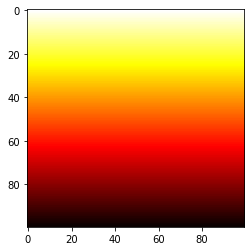

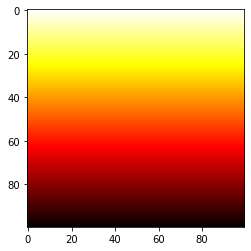

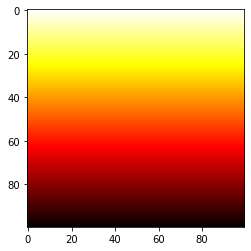

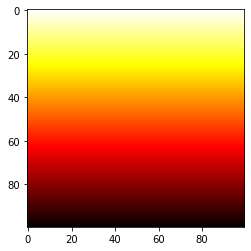

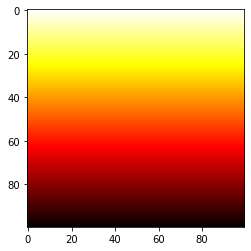

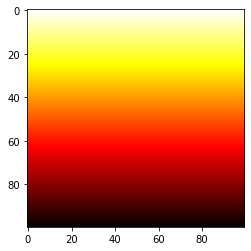

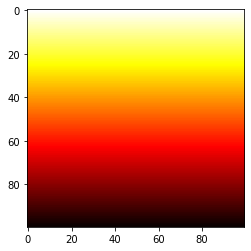

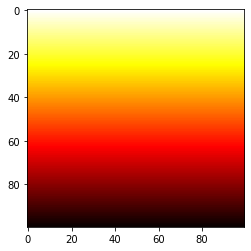

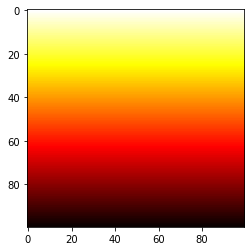

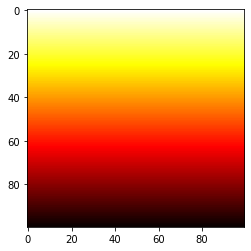

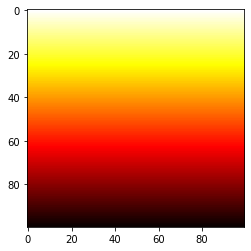

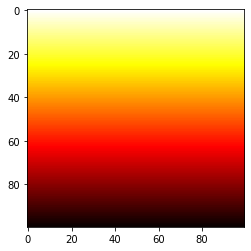

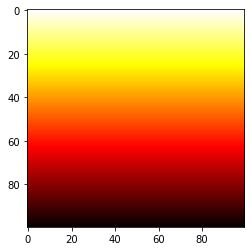

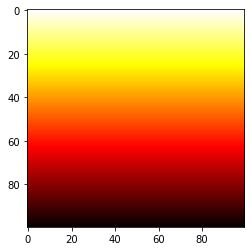

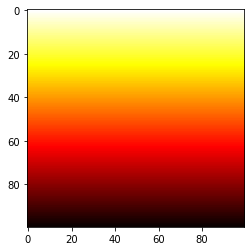

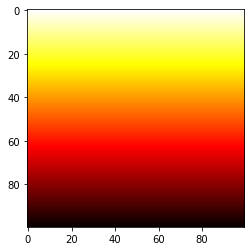

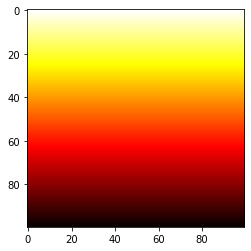

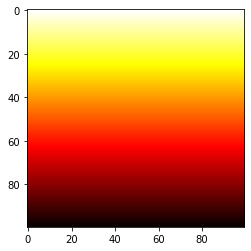

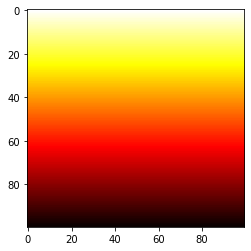

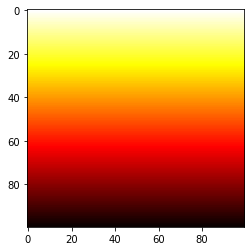

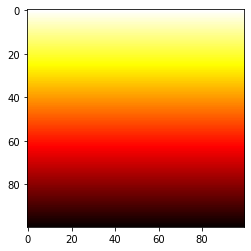

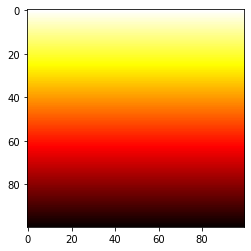

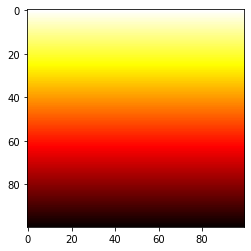

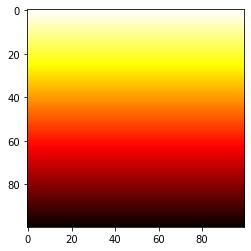

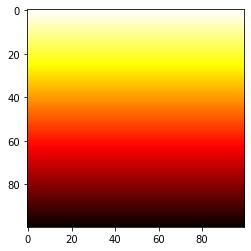

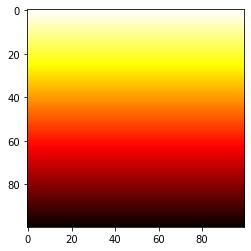

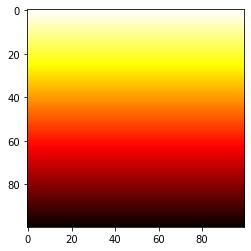

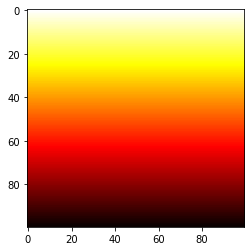

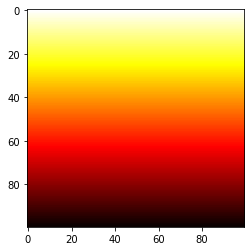

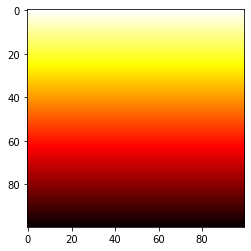

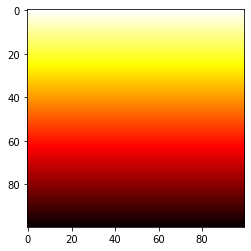

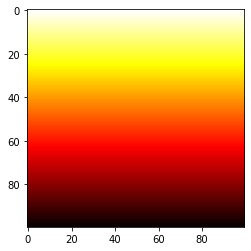

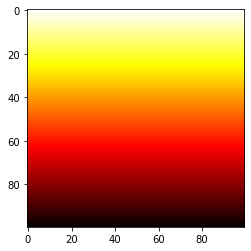

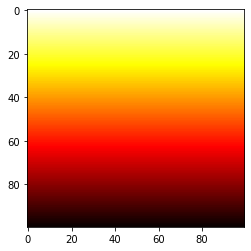

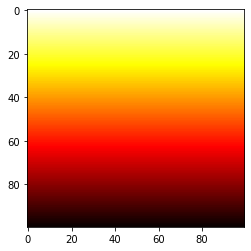

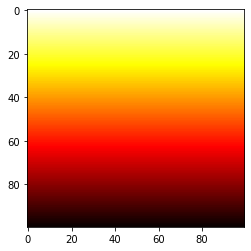

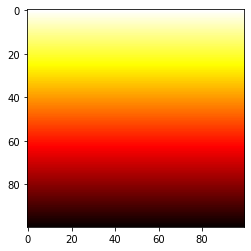

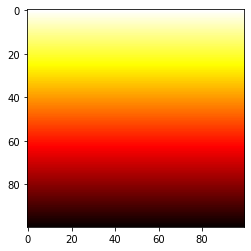

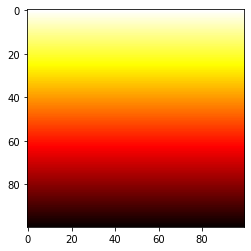

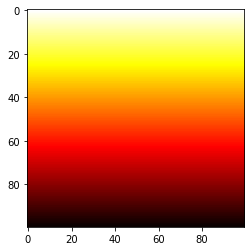

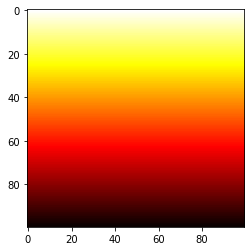

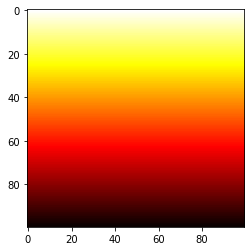

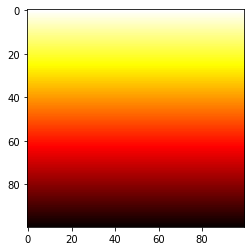

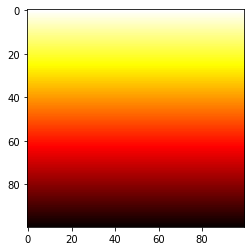

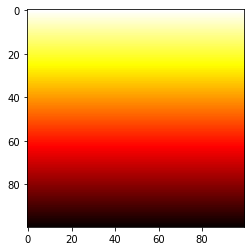

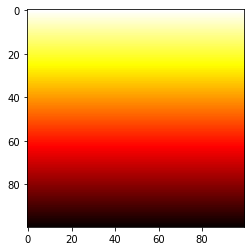

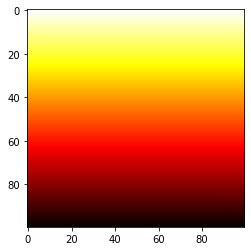

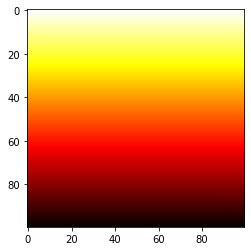

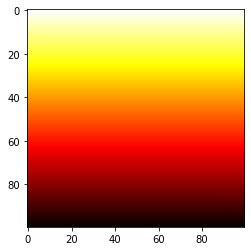

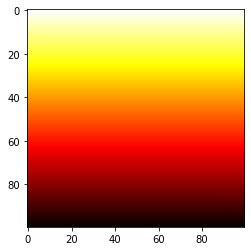

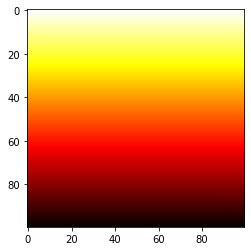

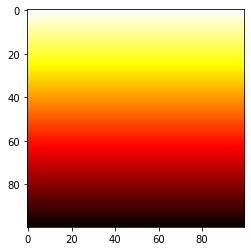

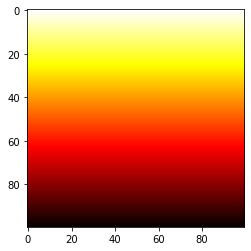

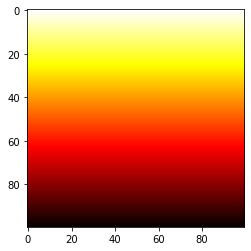

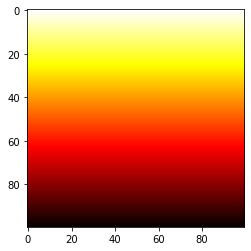

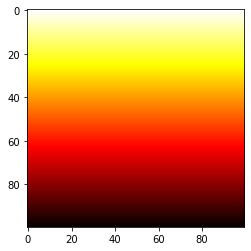

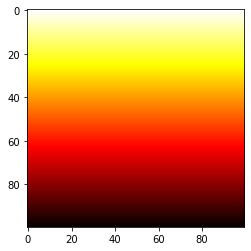

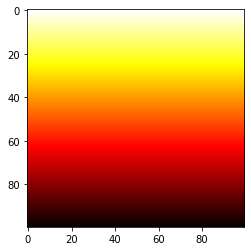

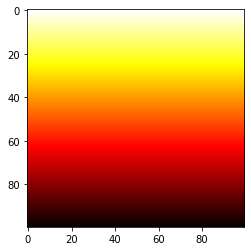

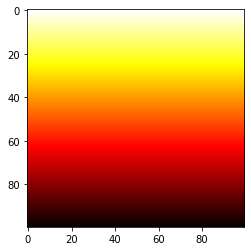

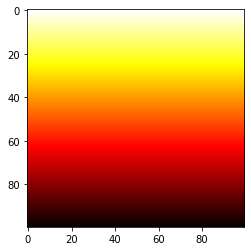

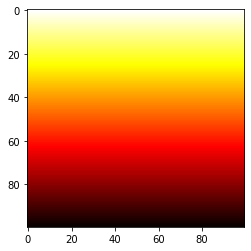

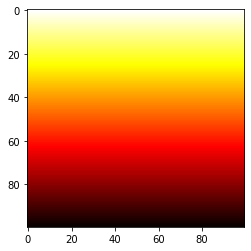

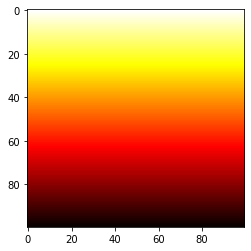

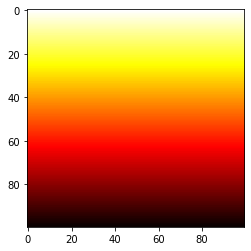

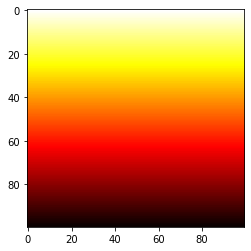

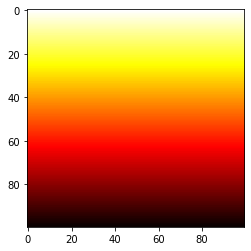

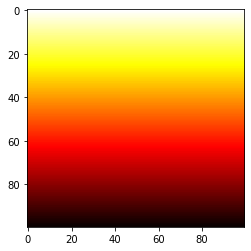

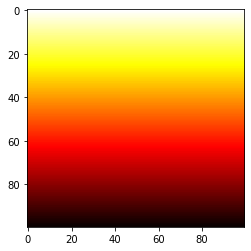

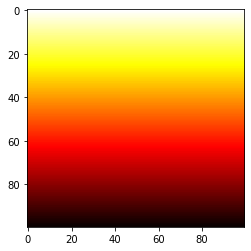

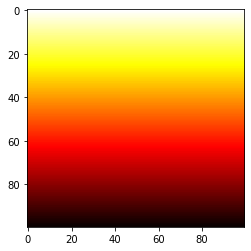

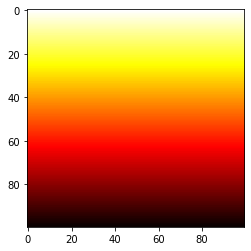

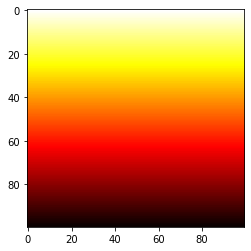

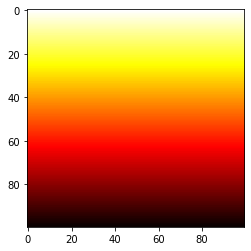

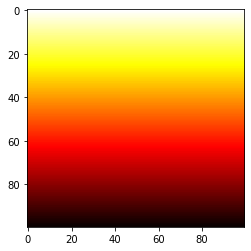

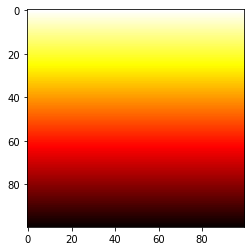

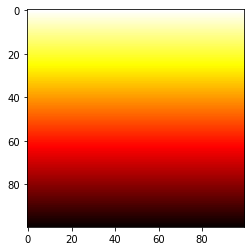

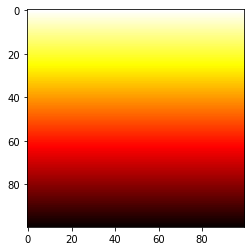

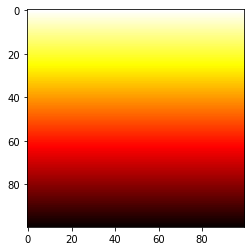

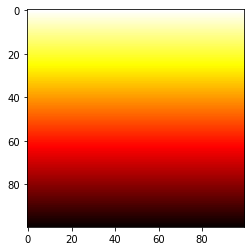

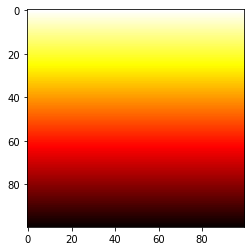

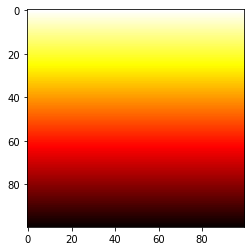

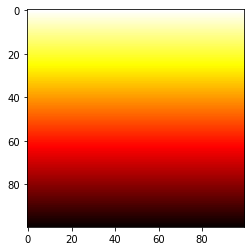

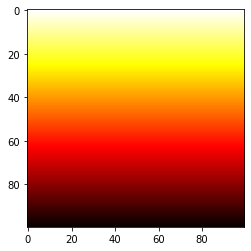

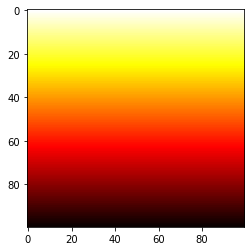

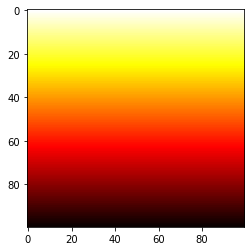

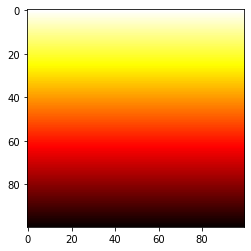

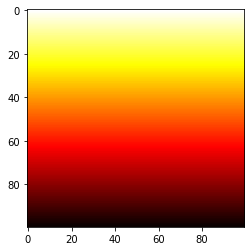

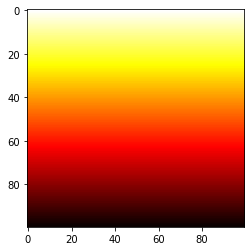

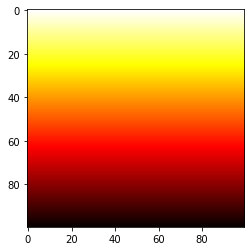

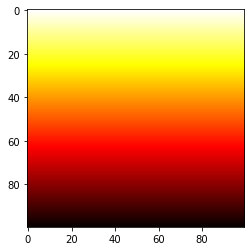

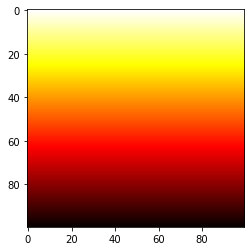

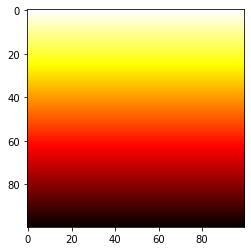

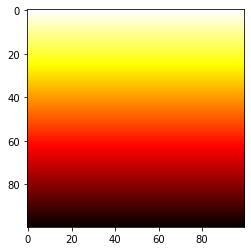

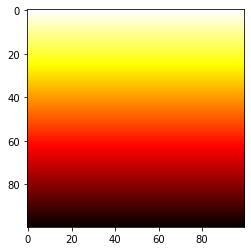

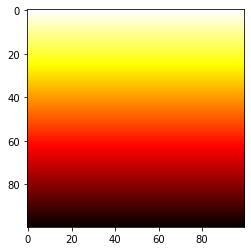

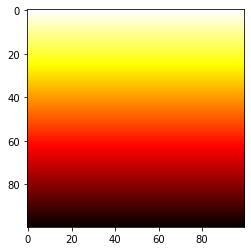

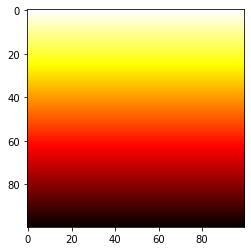

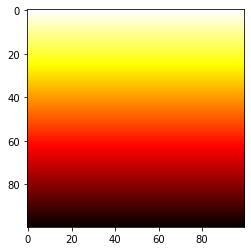

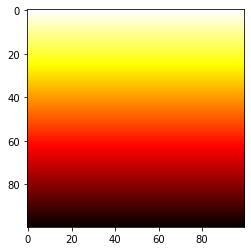

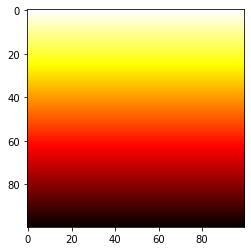

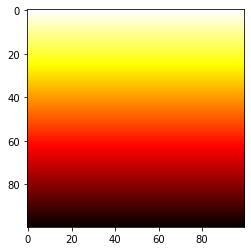

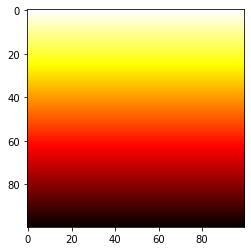

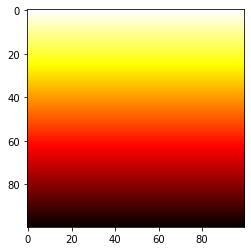

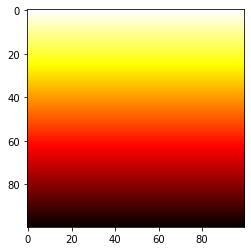

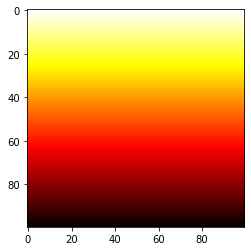

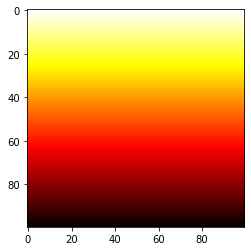

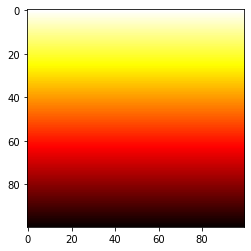

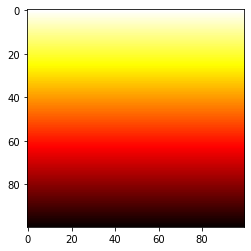

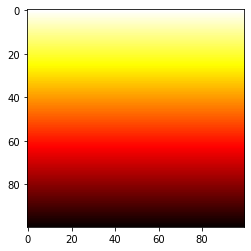

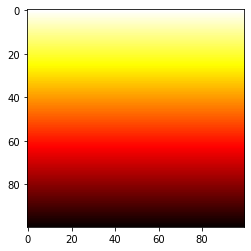

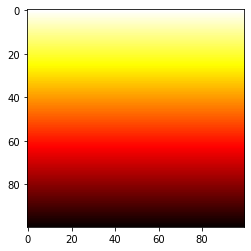

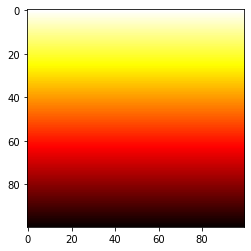

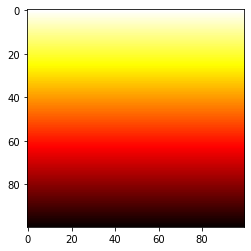

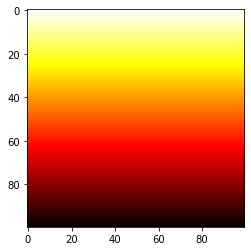

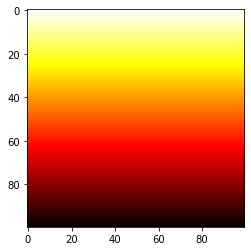

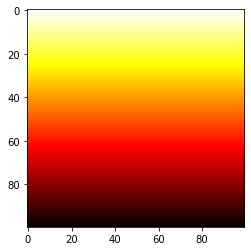

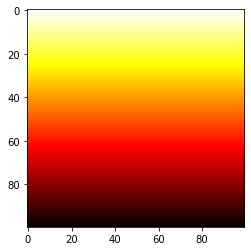

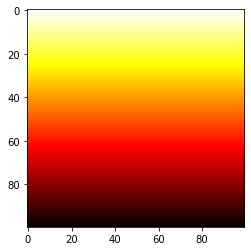

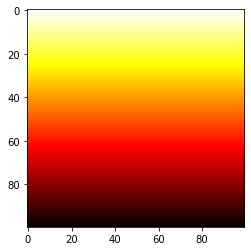

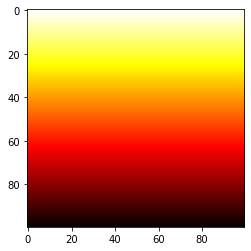

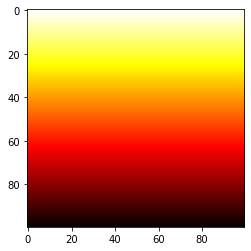

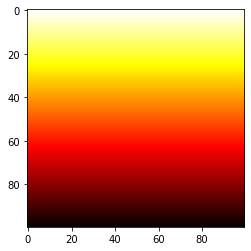

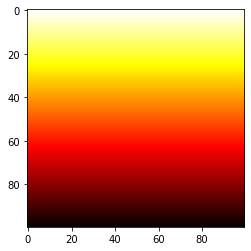

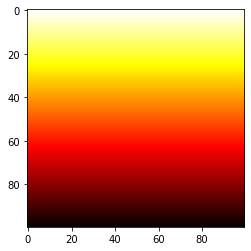

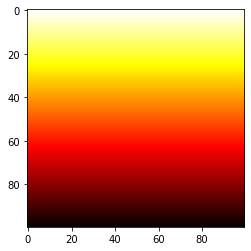

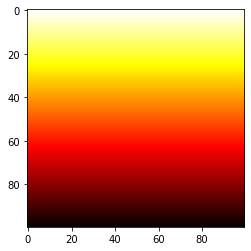

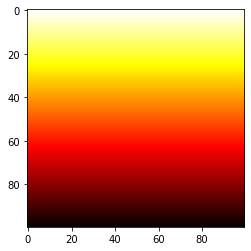

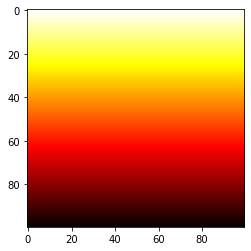

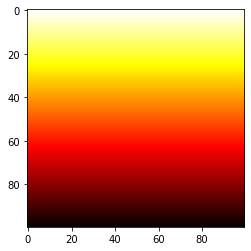

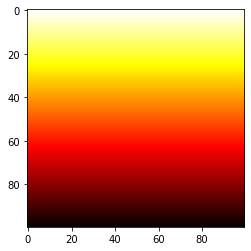

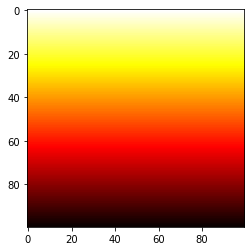

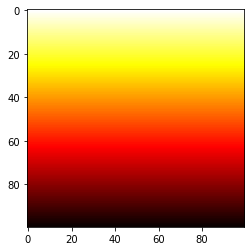

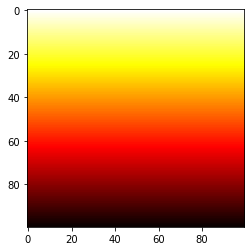

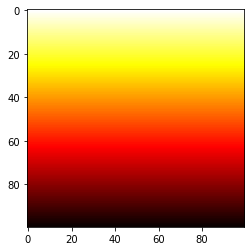

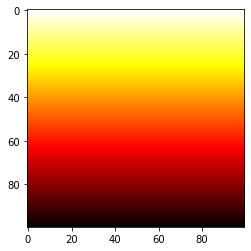

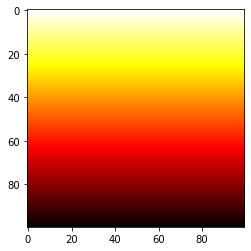

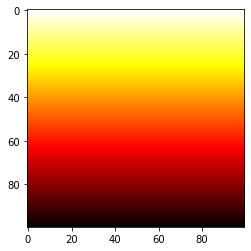

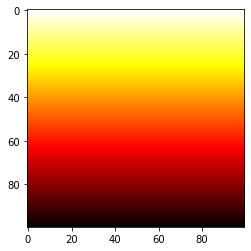

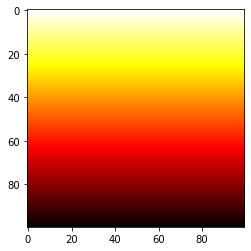

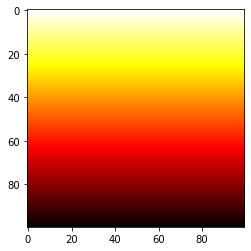

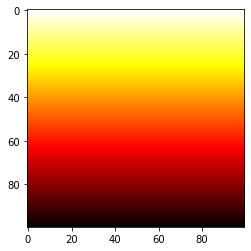

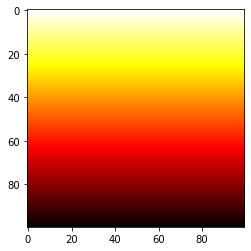

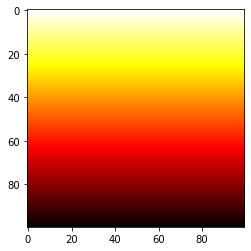

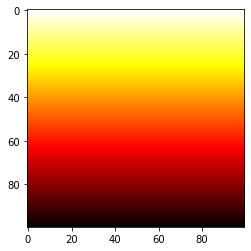

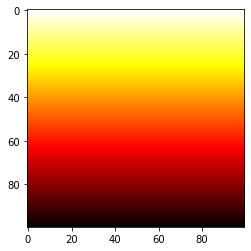

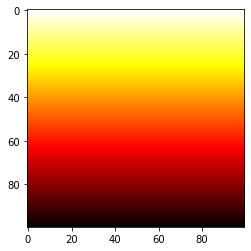

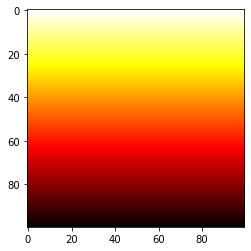

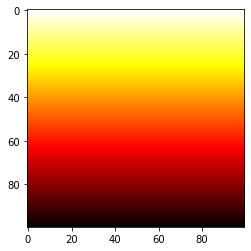

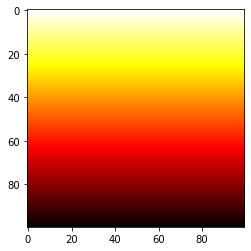

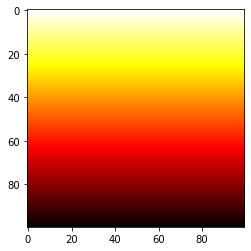

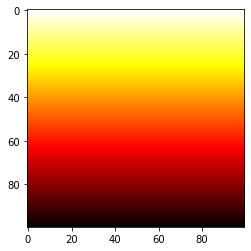

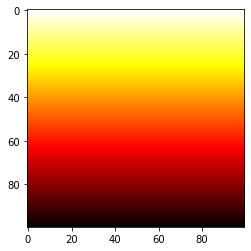

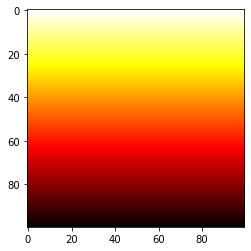

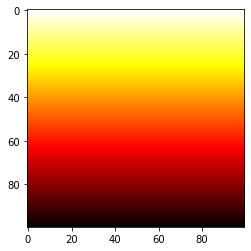

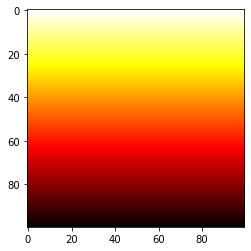

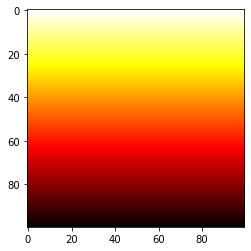

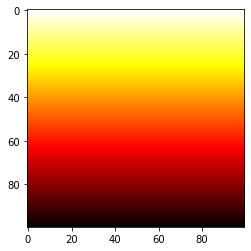

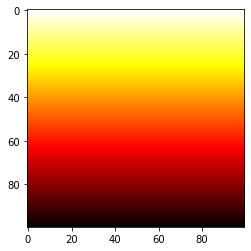

No handles with labels found to put in legend.


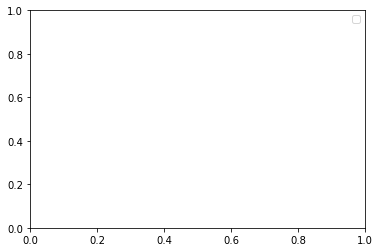

In [21]:
grid = init(N)
z = 0.001
y = np.linspace(0,1,100)
for t in range(t_max):
    grid = update_dif(grid, D)
    if t%100==0:
        plt.imshow(grid, cmap='hot')
        plt.show()
    if t == 100:
        print( "c = ",grid[20,0])
#     if t >= z * t_max:
#         c_lijst = grid[:,0]
#         plt.plot(y, c_lijst, label = z )
#         z = z * 10
plt.legend()
plt.show()
        

In [22]:
def analytic(Y, t, t_max, D):
    t = t * dt
    c = 0
    for i in range (t_max):
        Z_neg = (1 - Y + 2*i) / (2* np.sqrt(D*t))
        Z_pos = (1 + Y + 2*i) / (2* np.sqrt(D*t))
        c = c + sp.erfc(Z_neg) - sp.erfc(Z_pos)
#         print( sp.erfc(Z_neg), sp.erfc(Z_pos))
    return c

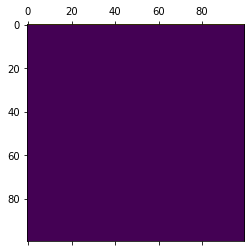

In [29]:
fig, ax = plt.subplots()
grid = ax.matshow(init(N))

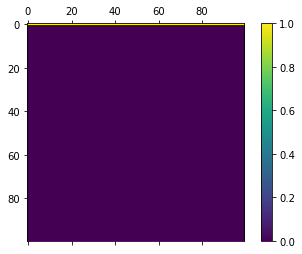

In [32]:
def update(grid):
    grid = update_dif(grid, D)
    grid.set_data(grid)
    return grid 


fig, ax = plt.subplots()
grid = ax.matshow(init(N))
plt.colorbar(mat)
ani = animation.FuncAnimation(fig, update, interval=40000,
                              save_count=50)


In [33]:
ani